This project is created by Sandeep Mishra, 
Kindly Note I have taken a small portion of set of data from the passage a s the modified txt. 
In modified text I have replaced "the" -------> "teh"
Also note the code is working but for GPT-NEO it is taking a bit time as the model is heavy to dowload.

Thank you for this task .... Have a great day!!

STEP 0 :: Import Of Library and Packages

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from torch.nn import functional as F
import pandas as pd 

/home/sandeep/Pictures/Perplexities/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


STEP 1 ::   Load a Pre-trained Model & Dataset For GPT2:

In [2]:
# The below function is for the GPT 2 
def load_model_and_tokenizer_for_gpt2(model_name="gpt2"):
    """Load a pre-trained model and tokenizer from Hugging Face."""
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    return tokenizer, model
tokenizer, model = load_model_and_tokenizer_for_gpt2()


In [3]:
def load_wikitext2(split="test"):
    """Load the Wikitext-2 dataset."""
    dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split=split)
    dataset = [text.strip() for text in dataset["text"] if text.strip() and len(text.strip()) > 10]
    # print("\nDataset :: \n",dataset[:100])
    return dataset[:10]  # Using a subset for efficiency
test_samples = load_wikitext2()
print("Test Samples  ::",test_samples)


Test Samples  :: ['= Robert Boulter =', 'Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall .', 'In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He

STEP 2 :: Compute Perplexity For GPT2

In [4]:
def compute_perplexity(model, tokenizer, text_samples):
    """Compute perplexity for given text samples using a pre-trained model."""
    perplexities = []
    for text in text_samples:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        # print("Tokens:", inputs)
        # Check if input_ids are empty
        if inputs["input_ids"].numel() == 0:
            print(f"Warning: Empty input for text: {text}")
            perplexities.append(float("inf"))  # Assign a high perplexity to invalid inputs
            continue
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        perplexities.append(perplexity)
    return perplexities


# Compute perplexity
perplexities = compute_perplexity(model, tokenizer, test_samples)
for i, p in enumerate(perplexities):
    print(f"Sample {i+1}: Perplexity = {p:.2f}")

Sample 1: Perplexity = 959.94
Sample 2: Perplexity = 53.73
Sample 3: Perplexity = 42.75
Sample 4: Perplexity = 2679.38
Sample 5: Perplexity = 175.25
Sample 6: Perplexity = 44.24
Sample 7: Perplexity = 56.41
Sample 8: Perplexity = 184.04
Sample 9: Perplexity = 53.07
Sample 10: Perplexity = 46.39


STEP 3 :: Adversarial Testing For GPT2

In [5]:
# Read modified samples from the file
with open("modified_text.txt", "r", encoding="utf-8") as file:
    modified_samples = [text.strip() for text in file.readlines() if text.strip()]  # Remove empty lines

if not modified_samples:
    print("Error: No valid modified text samples found.")
# Compute perplexity for the modified samples
modified_perplexities = compute_perplexity(model, tokenizer, modified_samples)
print("\nModified_perplexities",modified_perplexities)
print("\nOnly one sample in the output because modified_text.txt likely contains only one valid line after filtering out empty or invalid lines.\n")

# Added a file name modified_text.txt where i have replaced all  " the " or "The"  into ----------------------> "teh".



Modified_perplexities [34.889102935791016]

Only one sample in the output because modified_text.txt likely contains only one valid line after filtering out empty or invalid lines.



STEP 4 :: Visualization & Analysis For GPT2

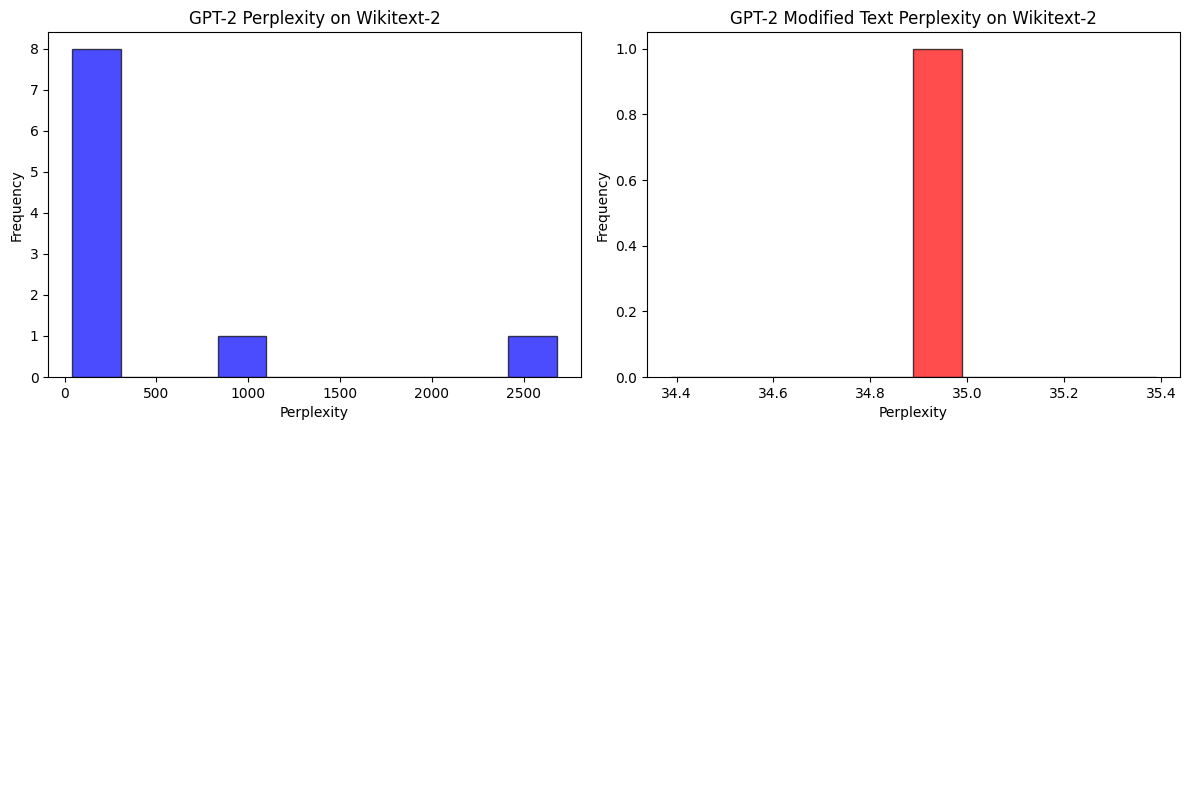

In [6]:
def plot_perplexity_comparison(perplexities_gpt2, modified_perplexities_gpt2):
    """Plot original and modified perplexity distributions in a 2x2 grid."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
    axes = axes.flatten()  # Convert 2D array to 1D
    # Original perplexity plot
    axes[0].hist(perplexities_gpt2, bins=10, alpha=0.7, color='blue', edgecolor='black')
    axes[0].set_xlabel("Perplexity")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("GPT-2 Perplexity on Wikitext-2")

    # Modified perplexity plot
    axes[1].hist(modified_perplexities_gpt2, bins=10, alpha=0.7, color='red', edgecolor='black')
    axes[1].set_xlabel("Perplexity")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("GPT-2 Modified Text Perplexity on Wikitext-2")
    # Hide unused subplots (axes[2] and axes[3]) if not needed
    axes[2].axis("off")
    axes[3].axis("off")
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

plot_perplexity_comparison(perplexities, modified_perplexities)


Now will use GPT-NEO model to get the perplexilty 

STEP 1 ::   Load a Pre-trained Model & Dataset For GPT-NEO:

In [8]:
def load_model_and_tokenizer_for_gpt_neo(model_name="EleutherAI/gpt-neo-1.3B"):
    """Load a pre-trained GPT-Neo model and tokenizer from Hugging Face."""
    tokenizer_for_neo = AutoTokenizer.from_pretrained(model_name)
    model_neo = AutoModelForCausalLM.from_pretrained(model_name)
    return tokenizer_for_neo, model_neo
tokenizer_for_neo, model_neo = load_model_and_tokenizer_for_gpt_neo()


In [9]:
def load_wikitext2(split="test"):
    """Load the Wikitext-2 dataset."""
    dataset_for_neo = load_dataset("wikitext", "wikitext-2-raw-v1", split=split)
    dataset_for_neo = [text.strip() for text in dataset_for_neo["text"] if text.strip() and len(text.strip()) > 10]
    # print("\nDataset :: \n",dataset[:100])
    return dataset_for_neo[:10]  # Using a subset for efficiency
test_samples_for_neo = load_wikitext2()
print("Test Samples  ::",test_samples_for_neo)

Test Samples  :: ['= Robert Boulter =', 'Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall .', 'In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He

STEP 2 :: Compute Perplexity For GPT-NEO

In [10]:
def compute_perplexity_for_neo(model_neo, tokenizer_for_neo, test_samples_for_neo):
    """Compute perplexity for given text samples using a pre-trained model."""
    perplexities_for_neo = []
    for text in test_samples_for_neo:
        inputs = tokenizer_for_neo(text, return_tensors="pt", truncation=True, max_length=512)
        # print("Tokens:", inputs)
        # Check if input_ids are empty
        if inputs["input_ids"].numel() == 0:
            print(f"Warning: Empty input for text: {text}")
            perplexities_for_neo.append(float("inf"))  # Assign a high perplexity to invalid inputs
            continue
        with torch.no_grad():
            outputs = model_neo(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        perplexity = torch.exp(loss).item()
        perplexities_for_neo.append(perplexity)
    return perplexities_for_neo


# Compute perplexity
perplex_by_neo= compute_perplexity_for_neo(model_neo, tokenizer_for_neo, test_samples_for_neo)
for i, p in enumerate(perplex_by_neo):
    print(f"Sample {i+1}: Perplexity For GPT-Neo= {p:.2f}")

Sample 1: Perplexity For GPT-Neo= 1259.84
Sample 2: Perplexity For GPT-Neo= 20.40
Sample 3: Perplexity For GPT-Neo= 18.04
Sample 4: Perplexity For GPT-Neo= 2087.72
Sample 5: Perplexity For GPT-Neo= 109.55
Sample 6: Perplexity For GPT-Neo= 25.65
Sample 7: Perplexity For GPT-Neo= 27.69
Sample 8: Perplexity For GPT-Neo= 134.72
Sample 9: Perplexity For GPT-Neo= 22.86
Sample 10: Perplexity For GPT-Neo= 26.93


STEP 3 :: Adversarial Testing For GPT-NEO

In [11]:


def modified_perplexity_for_neo():
    
    # Read modified samples from the file
    with open("modified_text.txt", "r", encoding="utf-8") as file:
        modified_samples = [text.strip() for text in file.readlines() if text.strip()]  # Remove empty lines
    if not modified_samples:
        print("Error: No valid modified text samples found.")
        return
    # Compute perplexity for the modified samples
    modified_perplexities_for_neo = compute_perplexity_for_neo(model_neo, tokenizer_for_neo, modified_samples)
    print("\nModified_perplexities for Neo",modified_perplexities_for_neo)
    print("\nOnly one sample in the output because modified_text.txt likely contains only one valid line after filtering out empty or invalid lines.\n")
    return modified_perplexities_for_neo


# Added a file name modified_text.txt where i have replaced all  " the  " or "The"  into ----------------------> "teh".
Neo_modified_perplexities=modified_perplexity_for_neo()


Modified_perplexities for Neo [14.878764152526855]

Only one sample in the output because modified_text.txt likely contains only one valid line after filtering out empty or invalid lines.



STEP 4 :: Visualization & Analysis For GPT-NEO

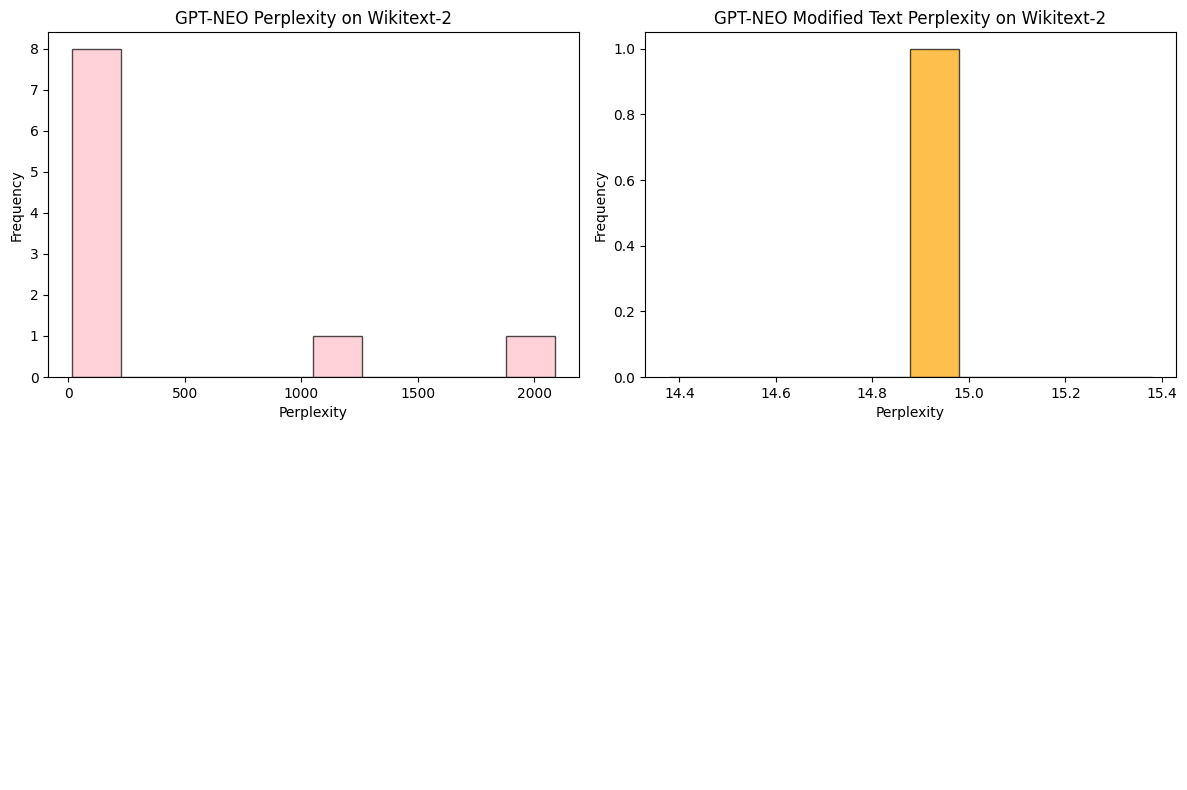

In [12]:
def plot_perplexity_comparison_for_neo(perplex_by_neo, Neo_modified_perplexities):
    """Plot original and modified perplexity distributions in a 2x2 grid."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
    axes = axes.flatten()  # Convert 2D array to 1D
    # Original perplexity plot
    # print("perplecity :: ", perplex_by_neo)
    axes[0].hist(perplex_by_neo, bins=10, alpha=0.7, color='pink', edgecolor='black')
    axes[0].set_xlabel("Perplexity")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("GPT-NEO Perplexity on Wikitext-2")

    # Modified perplexity plot
    axes[1].hist(Neo_modified_perplexities, bins=10, alpha=0.7, color='orange', edgecolor='black')
    axes[1].set_xlabel("Perplexity")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("GPT-NEO Modified Text Perplexity on Wikitext-2")
    # Hide unused subplots (axes[2] and axes[3]) if not needed
    axes[2].axis("off")
    axes[3].axis("off")
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

plot_perplexity_comparison_for_neo(perplex_by_neo, Neo_modified_perplexities)

STEP 5 :: Comparative Analysis Across Models For GPT2 vs GPT-NEO

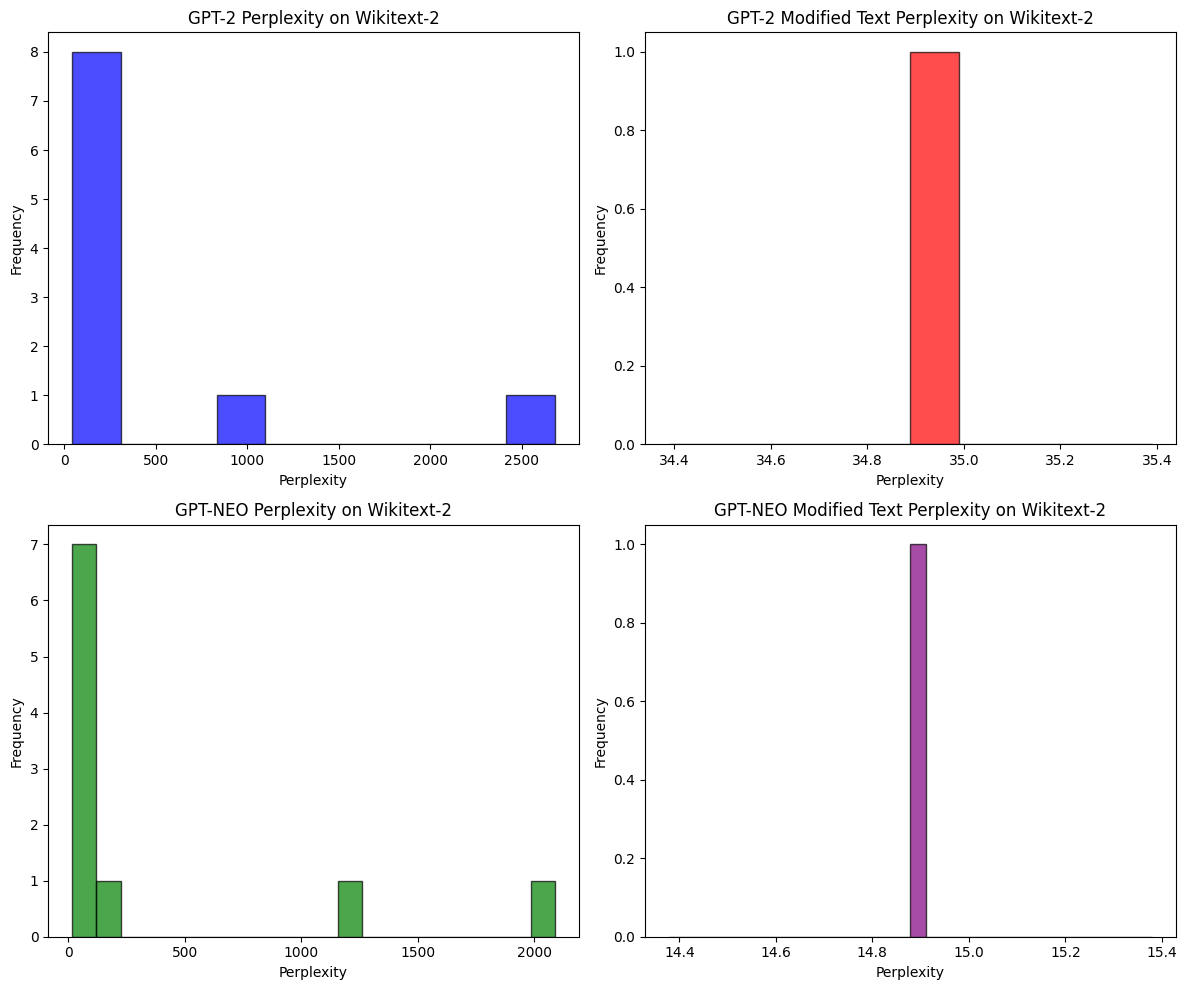

In [13]:
def analysis_perplexity_comparison(original_perplexities, modified_perplexities, perplex_by_neo, Neo_modified_perplexities):
    """Plot original and modified perplexity distributions in a 2x2 grid."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

    # Original perplexity plot
    axes[0, 0].hist(original_perplexities, bins=10, alpha=0.7, color='blue', edgecolor='black')
    axes[0, 0].set_xlabel("Perplexity")
    axes[0, 0].set_ylabel("Frequency")
    axes[0, 0].set_title("GPT-2 Perplexity on Wikitext-2")

    # Modified perplexity plot
    axes[0, 1].hist(modified_perplexities, bins=10, alpha=0.7, color='red', edgecolor='black')
    axes[0, 1].set_xlabel("Perplexity")
    axes[0, 1].set_ylabel("Frequency")
    axes[0, 1].set_title("GPT-2 Modified Text Perplexity on Wikitext-2")

    # Additional modified perplexity plot (old)
    axes[1, 0].hist(perplex_by_neo, bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[1, 0].set_xlabel("Perplexity")
    axes[1, 0].set_ylabel("Frequency")
    axes[1, 0].set_title("GPT-NEO Perplexity on Wikitext-2")

    # Additional modified perplexity plot (new)
    axes[1, 1].hist(Neo_modified_perplexities, bins=30, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 1].set_xlabel("Perplexity")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].set_title("GPT-NEO Modified Text Perplexity on Wikitext-2")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


analysis_perplexity_comparison(perplexities, modified_perplexities, perplex_by_neo, Neo_modified_perplexities)